In [11]:
# import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

In [39]:
vessels = pd.read_csv('vessels.csv', delimiter='|')
ais_data = pd.read_csv('ais_train.csv', delimiter='|')

# How many rows are in the ais_data DataFrame?
print(ais_data.shape[0])

1522065


In [13]:
# Merge the two dataframes
ais_data = pd.merge(ais_data, vessels, on='vesselId')

In [14]:
# Order the rows by vesselId and time
ais_data = ais_data.sort_values(by=['vesselId', 'time'])

In [40]:
# Give me a list of all the unique vesselIds
vessels = ais_data['vesselId'].unique()


688


/Users/mortensunde/miniforge3/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


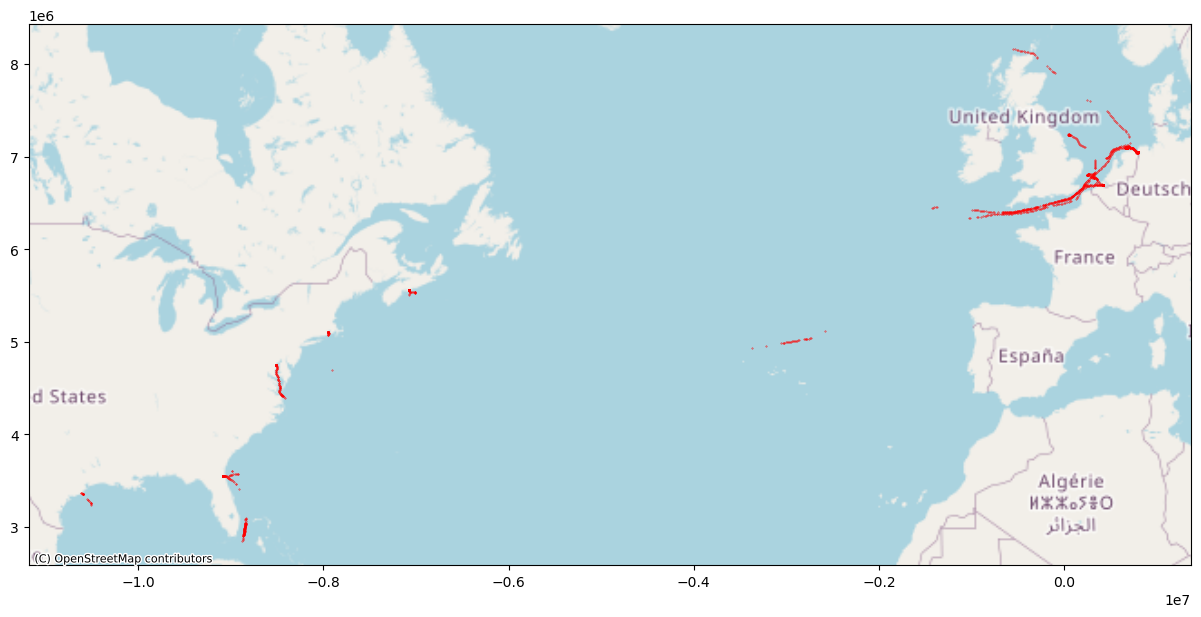

In [43]:
# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(ais_data['longitude'], ais_data['latitude'])]
crs = {'init': 'epsg:4326'}
ais_geo = gpd.GeoDataFrame(ais_data, crs=crs, geometry=geometry)

# Get the second vesselId
vessel_id = vessels[100]

# Reproject to Web Mercator
ais_geo = ais_geo.to_crs(epsg=3857)

# Plot the first vessel
fig, ax = plt.subplots(figsize=(15, 10))
ais_geo[ais_geo['vesselId'] == vessel_id].plot(ax=ax, markersize=0.1, color='red')

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.show()

In [54]:
# I want to create a feature called "morrowed".
# This feature will be 1 if the vessel is not moving in the next time step, 0 otherwise.
# The definition of moving is if the speed is greater than 0.1.

# How many null columns for the speed?
print(ais_data['sog'].isnull().sum())

# What is the mean of sog? 
print(ais_data['sog'].mean())

# How many entries with sog < 0.1?
print("SOG < 0.1")
print(ais_data[ais_data['sog'] < 0.1].shape[0])

# How many with sog > 0.1?
print("SOG > 0.1")
print(ais_data[ais_data['sog'] > 0.1].shape[0])


0
6.331702588260034
SOG < 0.1
650180
SOG > 0.1
801118
